# Spam Emails
##### - Mayank Srivastava

- <small>[![LinkedIn](https://img.shields.io/badge/LinkedIn-Connect-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/mayank-srivastava-6a8421105/)</small>
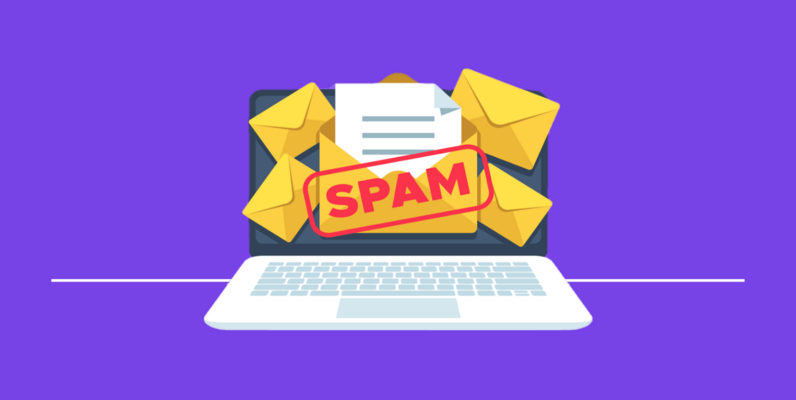


### About Dataset
#### Overview:
This dataset contains a collection of emails, categorized into two classes: "Spam" and "Non-Spam" (often referred to as "Ham"). These emails have been carefully curated and labeled to aid in the development of spam email detection models. 


#### Context:
Spam emails continue to be a significant issue, with malicious actors attempting to deceive users with unsolicited, fraudulent, or harmful messages. This dataset is designed to facilitate research, development, and testing of algorithms and models aimed at accurately identifying and filtering spam emails, helping protect users from various threats.

#### Content:
The dataset includes the following features:
Message: The content of the email, including the subject line and message body.
Category: Categorizes each email as either "Spam" or "Ham" (Non-Spam).

#### Potential Use Cases:

1. Email Filtering: Develop and evaluate email filtering systems that automatically classify incoming emails as spam or non-spam.
2. Natural Language Processing (NLP): Use the email text for text classification, topic modeling, and sentiment analysis.
3. Machine Learning: Create machine learning models for spam detection, potentially employing various algorithms and techniques.
4. Feature Engineering: Explore email content features that contribute to spam classification accuracy.
5. Data Analysis: Investigate patterns and trends in spam email content and characteristics.

#### License:
Please note that this dataset is for research and analysis purposes only and may be subject to copyright and data use restrictions. Ensure compliance with relevant policies when using this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
#checking the shape
df.shape

(5572, 2)

In [3]:
# checking the info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


##### Observations:

    1. shape = 5572 rows x 2 columns
    2. target column= Category
    3. Null values  = NA

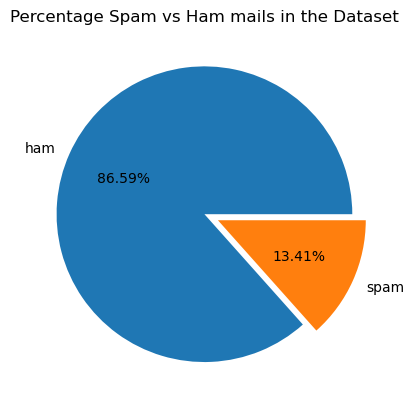

In [4]:
data=df.Category.value_counts()
plt.pie(data, labels=data.index, autopct ='%1.2f%%', explode =[0,0.1])
plt.title('Percentage Spam vs Ham mails in the Dataset')
plt.show()

In [5]:
# checking Category Distribution
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

## Standardization

In [6]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [7]:
import re
from nltk import stem
def standardize(text):
    #converted to lowercase
    text=text.lower()
    
    #removed punctuations
    doc=re.findall(r'\w+', text)
    text=' '.join(doc)
    
    #lemmatize
    doc =nlp(text)
    text =' '.join([token.lemma_ for token in doc])
    
    #stem
    ps=stem.porter.PorterStemmer()
    text=' '.join([ps.stem(token) for token in text.split(' ')])
    
    return text

In [8]:
df.Message =df.Message.apply(standardize)

In [9]:
df.Message

0       go until jurong point crazi avail onli in bugi...
1                                   ok lar joke wif u oni
2       free entri in 2 a wkli comp to win fa cup fina...
3             u dun say so earli hor u c alreadi then say
4       nah i don t think he go to usf he live around ...
                              ...                        
5567    thi be the 2nd time we have tri 2 contact u u ...
5568                      will ü b go to esplanad fr home
5569        piti be in mood for that so ani other suggest
5570    the guy do some bitch but i act like i d be in...
5571                              rofl it true to it name
Name: Message, Length: 5572, dtype: object

In [10]:
# Encoding the target class
# spam =1 and ham =0
df.Category =df.Category.replace(['ham','spam'], [0,1])

## train_test_split

In [11]:
from sklearn.model_selection import train_test_split
x=df.Message
y=df.Category
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=40, stratify = y)

## Vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tv=TfidfVectorizer(stop_words='english')
xtrain_tv=tv.fit_transform(xtrain)
xtest_tv=tv.transform(xtest)

## Training ML models

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
logr= LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svc=SVC()
ad=AdaBoostClassifier()
nb=GaussianNB()

In [16]:
models = {'LOGR': logr, "DT": dt, 'RF': rf, 'AD': ad, 'SVC': svc, 'KNN':knn, 'NB':nb}

In [17]:
#metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix

In [18]:
for i in models:
    model=models[i]
    model.fit(xtrain_tv.toarray(), ytrain)
    print(model)
    
    #predicting training data
    predict_xtrain = model.predict(xtrain_tv.toarray())
    print('training accuracy_score: ', accuracy_score(ytrain, predict_xtrain))
    print('training precision_score: ', precision_score(ytrain, predict_xtrain))
    print('training recall_score: ', recall_score(ytrain, predict_xtrain))
    print('training f1_score: ', f1_score(ytrain, predict_xtrain))
    print('training confusion_matrix: \n', confusion_matrix(ytrain, predict_xtrain))

    #predicting testing data
    predict_xtest = model.predict(xtest_tv.toarray())
    print('testing accuracy_score: ', accuracy_score(ytest, predict_xtest))
    print('testing precision_score: ', precision_score(ytest, predict_xtest))
    print('testing recall_score: ', recall_score(ytest, predict_xtest))
    print('testing f1_score: ', f1_score(ytest, predict_xtest))
    print('testing confusion_matrix: \n', confusion_matrix(ytest, predict_xtest))
    print('\n\n')

LogisticRegression()
training accuracy_score:  0.9664102564102565
training precision_score:  0.9949494949494949
training recall_score:  0.7533460803059273
training f1_score:  0.8574537540805223
training confusion_matrix: 
 [[3375    2]
 [ 129  394]]
testing accuracy_score:  0.9593301435406698
testing precision_score:  0.9588235294117647
testing recall_score:  0.7276785714285714
testing f1_score:  0.8274111675126904
testing confusion_matrix: 
 [[1441    7]
 [  61  163]]



DecisionTreeClassifier()
training accuracy_score:  1.0
training precision_score:  1.0
training recall_score:  1.0
training f1_score:  1.0
training confusion_matrix: 
 [[3377    0]
 [   0  523]]
testing accuracy_score:  0.9665071770334929
testing precision_score:  0.8716814159292036
testing recall_score:  0.8794642857142857
testing f1_score:  0.8755555555555555
testing confusion_matrix: 
 [[1419   29]
 [  27  197]]



RandomForestClassifier()
training accuracy_score:  0.9997435897435898
training precision_score:  1.0
t

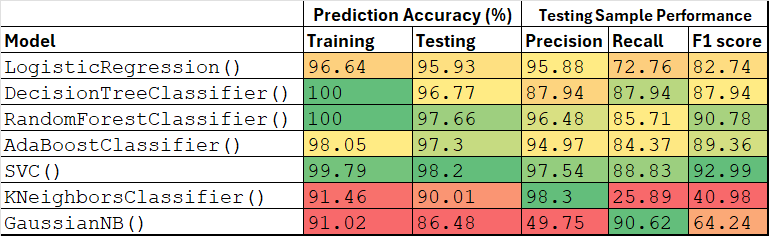